IMPORTING NECESSARY LIBRARIES

In [1]:
import numpy as np
from PIL import Image
from ImageProcessingUsingNumpy import ImageProcessing
from scipy.ndimage import convolve

Converting Image to Numpy array

In [2]:
img = Image.open('dog.jpg')
original_img = np.array(img)
original_img

array([[[ 57,  53,  41],
        [ 60,  56,  44],
        [ 62,  58,  46],
        ...,
        [ 76,  70,  54],
        [ 76,  70,  54],
        [ 74,  68,  52]],

       [[ 58,  54,  42],
        [ 59,  55,  43],
        [ 61,  57,  45],
        ...,
        [ 75,  69,  53],
        [ 76,  70,  54],
        [ 74,  68,  52]],

       [[ 60,  56,  44],
        [ 58,  54,  42],
        [ 59,  55,  43],
        ...,
        [ 75,  69,  53],
        [ 75,  69,  53],
        [ 76,  70,  54]],

       ...,

       [[ 92,  85,  67],
        [ 93,  86,  68],
        [ 93,  86,  68],
        ...,
        [241, 241, 241],
        [241, 241, 241],
        [241, 241, 241]],

       [[ 93,  86,  68],
        [ 94,  87,  69],
        [ 93,  86,  68],
        ...,
        [241, 241, 241],
        [241, 241, 241],
        [241, 241, 241]],

       [[ 89,  82,  64],
        [ 89,  82,  64],
        [ 90,  83,  65],
        ...,
        [241, 241, 241],
        [241, 241, 241],
        [241, 241, 241]]

Introduction

In [6]:
print("Welcome to the Image Processing Program!")
print("Please choose an operation:")
print()
print("1. Crop Image")
print("2. Rotate Image")
print("3. Flip Image")
print("4. Apply Filter")
print()
operation = int(input("Enter the number of the operation you want to perform: "))
print()

Welcome to the Image Processing Program!
Please choose an operation:

1. Crop Image
2. Rotate Image
3. Flip Image
4. Apply Filter




Creating an Instance of the ImageProcessing class

In [4]:
original_img_copy = original_img.copy()
img = ImageProcessing(original_img_copy)

Crop Image

In [5]:
if operation == 1:
    print("You chose to crop the image.")
    print()
    x1 = int(input("Enter initial x coordinate: "))
    y1 = int(input("Enter initial y coordinate: "))
    x2 = int(input("Enter final x coordinate: "))
    y2 = int(input("Enter final y coordinate: "))
    print()
    print("Cropping the image...")
    
    coord_1, coord_2 = (x1, y1), (x2, y2)
    img.crop_img(coord_2, coord_1)

Rotate Image

In [7]:
if operation == 2:
    print("You chose to rotate the image.")
    print()
    print("Choose: ")
    print("1. Rotate clockwise")
    print("2. Rotate counter-clockwise")
    direction = int(input())
    print()
    print("Available angles: 90, 180, 270")

    if direction == 1:
        print("You chose to rotate clockwise.")
        print()

        while True:
            angle = int(input("Enter the angle of rotation: "))
            if angle in [90, 180, 270]:
                break
            else:
                print("Invalid angle. Please enter 90, 180, or 270.")
        
        num = angle // 90   #Converting angle to number of turns
    
    elif direction == 2:
        print("You chose to rotate counter-clockwise.")
        print()

        while True:
            angle = int(input("Enter the angle of rotation: "))
            if angle in [90, 180, 270]:
                break
            else:
                print("Invalid angle. Please enter 90, 180, or 270.")
        
        num = -angle // 90  #Converting angle to number of turns

    print()
    print("Rotating the image...")
    img.rotate_img(num)

You chose to rotate the image.

Choose: 
1. Rotate clockwise
2. Rotate counter-clockwise

Available angles: 90, 180, 270
You chose to rotate clockwise.


Rotating the image...


Flip Image

In [7]:
if operation == 3:
    print("You chose to flip the image.")
    print()
    print("Choose flip direction:")
    print("1. Horizontal")
    print("2. Vertical")

    while True:
        direction = int(input())
        print()

        if direction == 1:
            print("Flipping image horizontally...")
            img.flip_img('h')
            break
        elif direction == 2:
            print("Flipping image vertically...")
            img.flip_img('v')
            break
        else:
            print("Invalid choice. Please enter 1 or 2.")

Apply Filters

In [ ]:
if operation == 4:
    print("You chose to apply a filter to the image.")
    print()
    print("Available filters:")
    print("1. Negative")
    print("2. Grayscale")
    print("3. Binarise")
    print("4. Blur")
    print("5. Sharpen")
    print("6. Edge Detection")
    
    while True:
        filter_choice = int(input())
        print()

        if filter_choice == 1:
            print("Generating Negative...")
            img.negative()
            break
        elif filter_choice == 2:
            print("Grayscaling Image...")
            img.grayscale()
        elif filter_choice == 3:
            print("Binarising Image...")
            img.binarise()
        elif filter_choice == 4:
            print("Blurring Image...")
            img.blur_img()
            break
        elif filter_choice == 5:
            print("Sharpening Image...")
            img.sharpen_img()
            break
        elif filter_choice == 6:
            print("Detecting Edges...")
            result = ImageProcessing.edge_detection(img.arr)
            break
        else:
            print("Invalid choice. Choose again.")
            

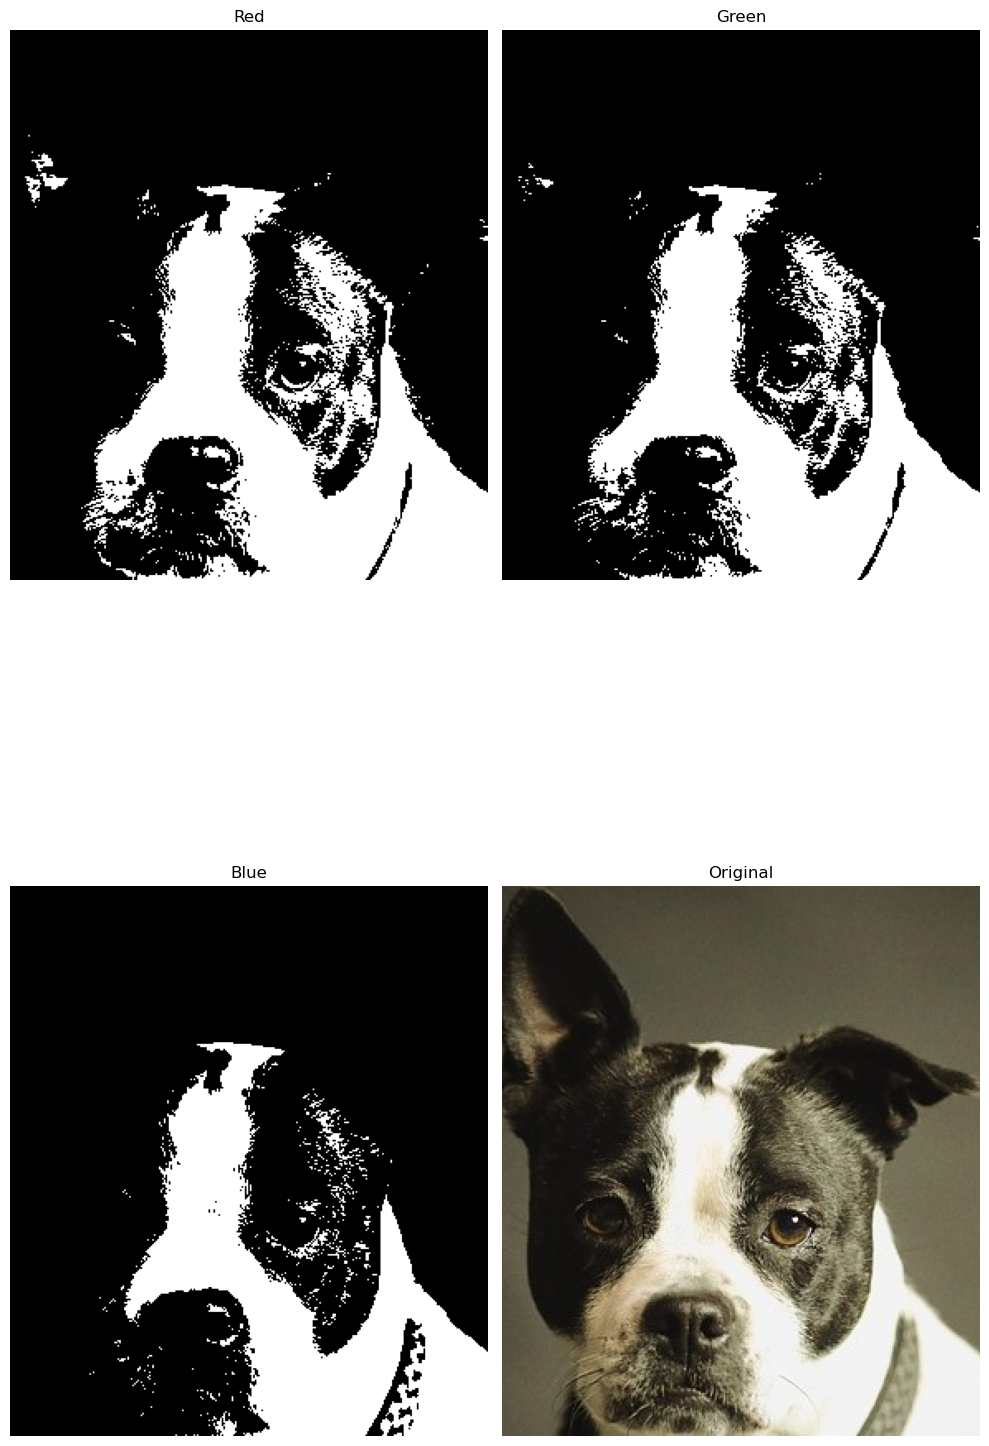

In [ ]:
red_binarised, green_binarised, blue_binarised = binarised_img[:,:,0], binarised_img[:, :, 1], binarised_img[:, :, 2]
compare_img((red_binarised, "Red"), (green_binarised, "Green"), (blue_binarised, "Blue"), (original_img, "Original"))

Image Creation

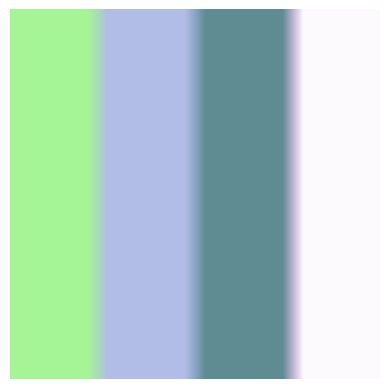

In [6]:
image = ImageProcessing.generate_image(channels=4)
ImageProcessing.display_img(image)

Comparison of Numpy vs Scipy Filters 

Sharpening

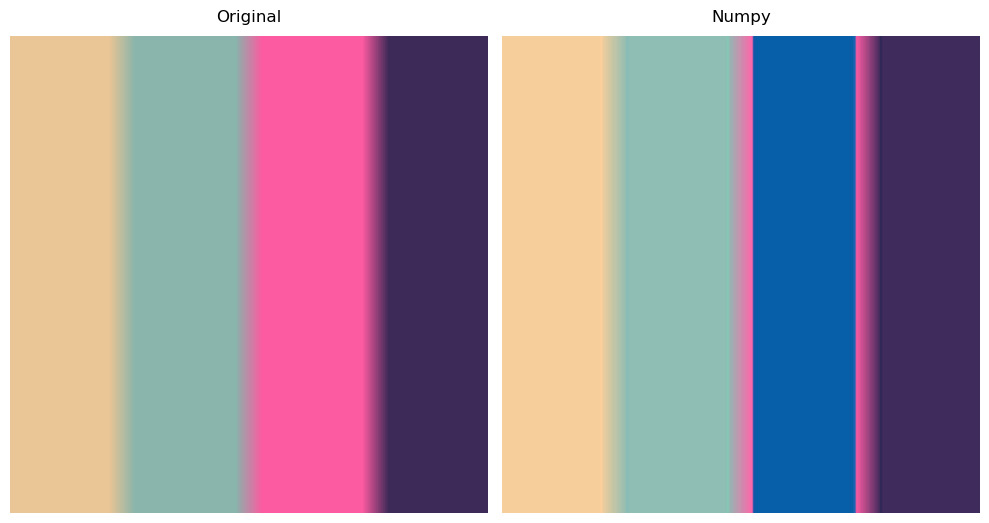

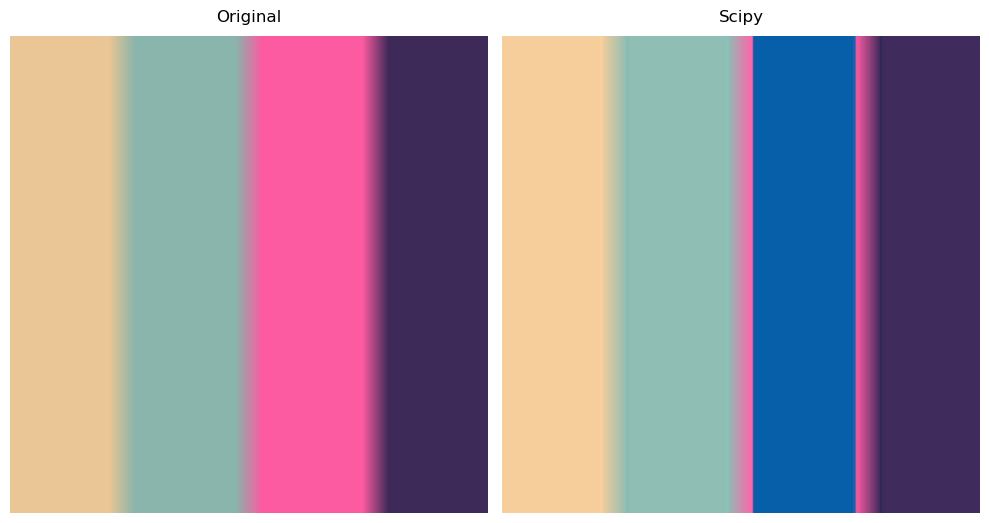

In [ ]:
sharpen = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])

result_sc = np.zeros_like(image)

for i in range(3):
    result_sc[:,:,i] = np.clip(convolve(image[:,:,i], sharpen), 0, 255)

result_np = ImageProcessing.convolve3d(image, sharpen)

ImageProcessing.compare_img((image.astype(np.uint8), "Original"), (result_np.astype(np.uint8), "Numpy"))
ImageProcessing.compare_img((image.astype(np.uint8), "Original"), (result_sc.astype(np.uint8), "Scipy"))

Blurring

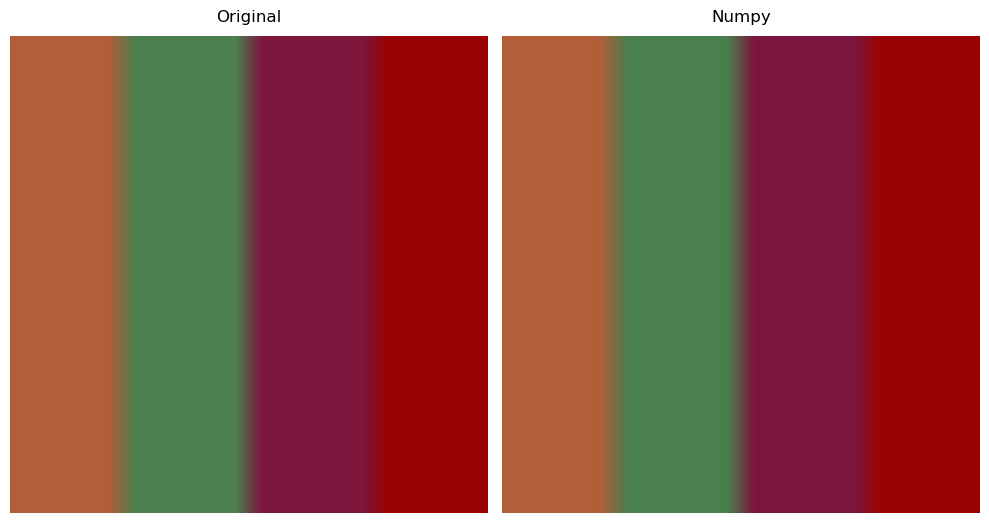

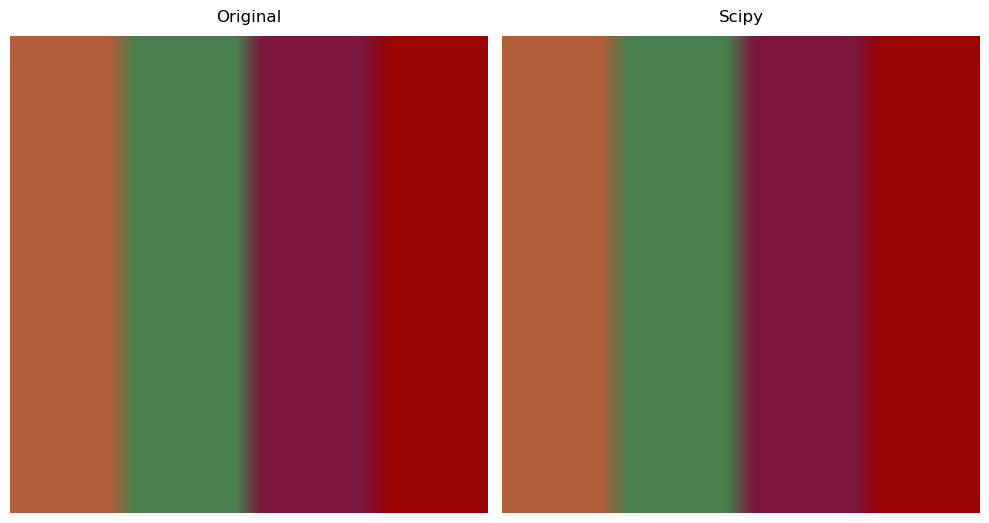

In [4]:
blur = np.array([   #Box Blur
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]
]) / 9

result_sc = np.zeros_like(image)

for i in range(3):
    result_sc[:,:,i] = np.clip(convolve(image[:,:,i], blur), 0, 255)

result_np = ImageProcessing.convolve3d(image, blur)

ImageProcessing.compare_img((image.astype(np.uint8), "Original"), (result_np.astype(np.uint8), "Numpy"))
ImageProcessing.compare_img((image.astype(np.uint8), "Original"), (result_sc.astype(np.uint8), "Scipy"))

Edge Detection

x_max 36
x_min 0
y_max 0
y_min 0
den_x 36
den_y 0


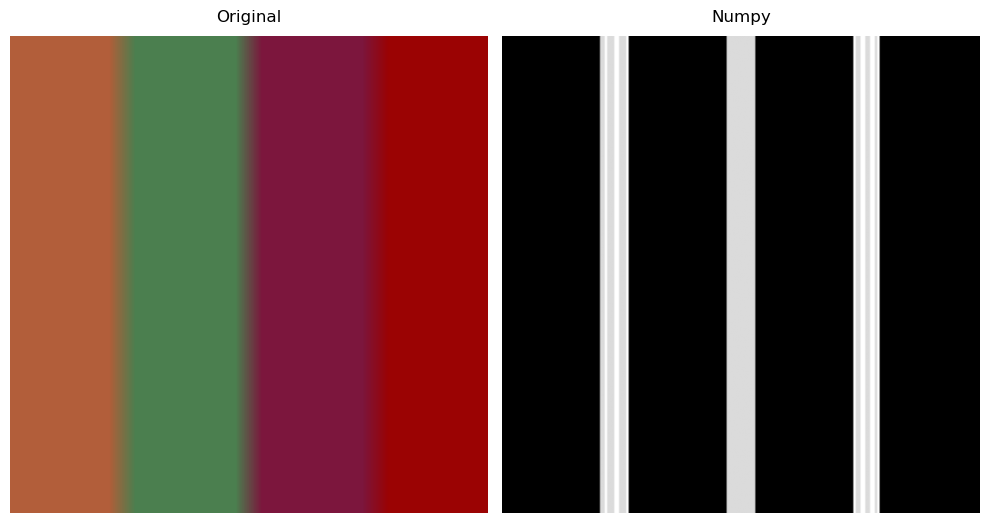

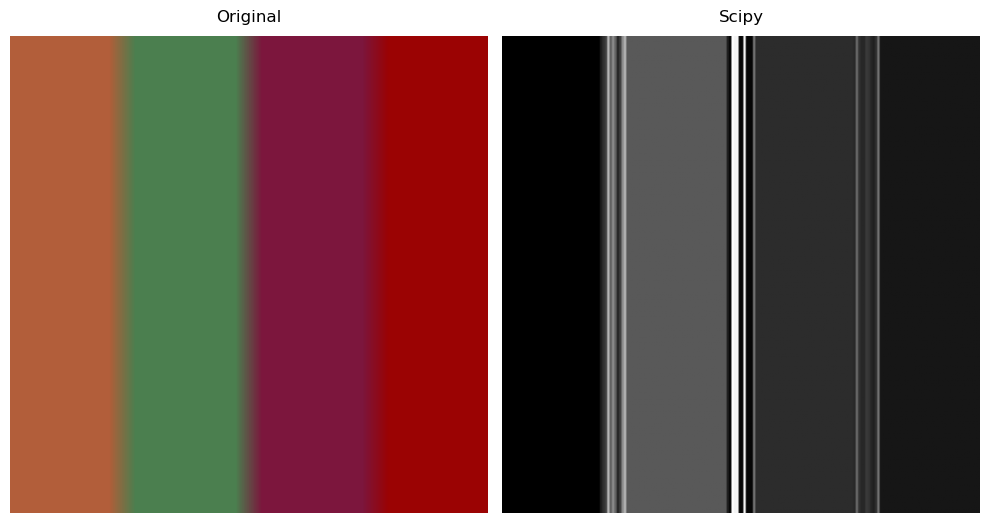

In [5]:
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

sobel_y = np.array([[-1, -2, -1],
                    [ 0,  0,  0],
                    [ 1,  2,  1]])

gray_img = np.dot(image, ImageProcessing.gray_convert_arr)

edge_x = np.abs(convolve(gray_img, sobel_x))
edge_y = np.abs(convolve(gray_img, sobel_y))

edge_x = 255 * ((edge_x - edge_x.min())/(edge_x.max() - edge_x.min()))
edge_y = 255 * ((edge_y - edge_y.min())/(edge_y.max() - edge_y.min()))
result_sc = np.hypot(edge_x, edge_y).astype(np.uint8)

result_np = ImageProcessing.edge_detection(image)

ImageProcessing.compare_img((image, "Original"), (result_np, "Numpy"))
ImageProcessing.compare_img((image, "Original"), (result_sc, "Scipy"))